In [41]:
import os
import gzip
import json
import pandas as pd
import _pickle as pickle
import numpy as np
import matplotlib.pyplot as plt
import datetime
from fbprophet import Prophet
%matplotlib inline

In [43]:
bg_path = '/home/jupyter/work/openaps/data/99908129/direct-sharing-31/entries_2017-01-01_to_2017-10-24.json'
df_bg = pd.read_json(bg_path)

In [58]:
bg_path_2 = '/home/jupyter/work/openaps/data/28176124/direct-sharing-31/entries__to_2018-11-05.json'
df_bg_2 = pd.read_json(bg_path_2)

In [61]:
df_bg_2.head()

,_id,_tell,body,date,dateString,date_type,device,direction,display_time,glucose,name,op,packet_size,raw,sgv,trend_arrow,type
0,5bdf8ae613b69104b6dc8580,5,NaN,2018-11-04 23:58:00,2018-11-05T01:58:00+02:00,relative,openaps://medtronic/pump/cgm,FortyFiveDown,2018-11-05T01:58:00+02:00,140,GlucoseSensorData,70,0,NaN,140,45_DOWN,sgv
1,5bdf885413b69104b6dc73d3,2,NaN,2018-11-04 23:58:00,2018-11-05T01:58:00+02:00,relative,openaps://medtronic/pump/cgm,SingleDown,2018-11-05T01:58:00+02:00,140,GlucoseSensorData,70,0,NaN,140,SINGLE_DOWN,sgv
2,5bdf885413b69104b6dc73d5,3,NaN,2018-11-04 23:53:00,2018-11-05T01:53:00+02:00,relative,openaps://medtronic/pump/cgm,NaN,2018-11-05T01:53:00+02:00,150,GlucoseSensorData,75,0,NaN,150,NaN,sgv
3,5bdf876213b69104b6dc6d3a,2,NaN,2018-11-04 23:53:00,2018-11-05T01:53:00+02:00,relative,openaps://medtronic/pump/cgm,SingleDown,2018-11-05T01:53:00+02:00,150,GlucoseSensorData,75,0,NaN,150,SINGLE_DOWN,sgv
4,5bdf876213b69104b6dc6d3b,18,NaN,2018-11-04 23:48:00,2018-11-05T01:48:00+02:00,relative,openaps://medtronic/pump/cgm,FortyFiveDown,2018-11-05T01:48:00+02:00,164,GlucoseSensorData,82,0,NaN,164,45_DOWN,sgv


In [59]:
def prophet_pre(df):
    df['ds']=df['date']
    df['y'] = df['sgv']
    return df[['ds', 'y']]

In [67]:
df_bg_2['ds'] = df_bg_2['date']
df_bg_2['y'] = df_bg_2['sgv']

In [69]:
m_2 = Prophet()
m_2.fit(df_bg_2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


NameError: name 'm2' is not defined

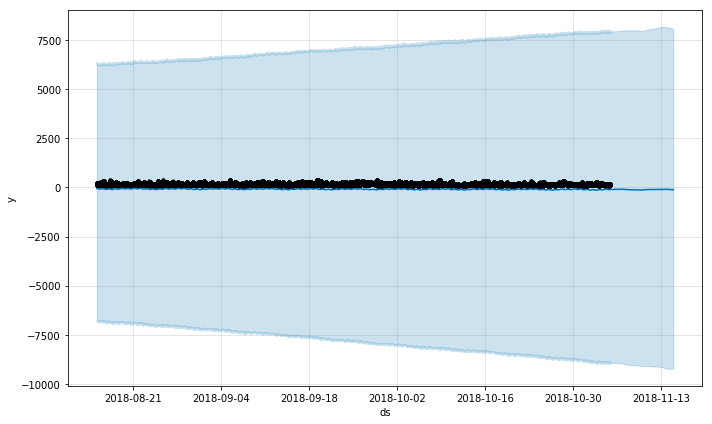

In [73]:
future = m_2.make_future_dataframe(periods=10)
forecast_2 = m.predict(future)
fig1 = m_2.plot(forecast_2)

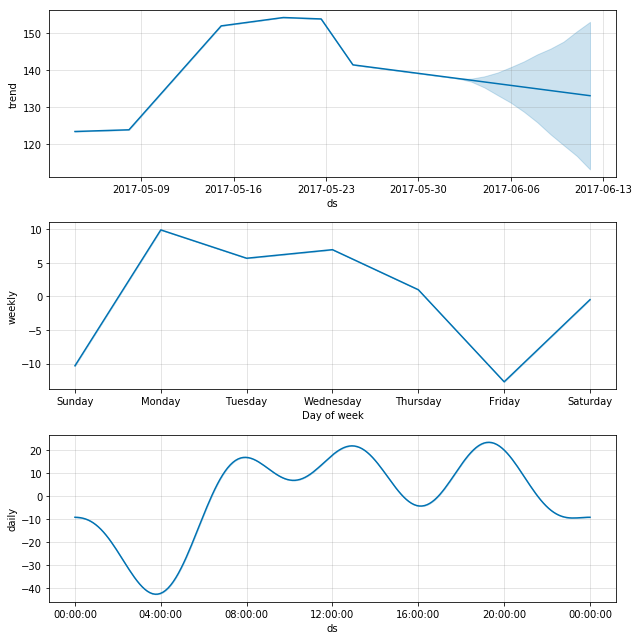

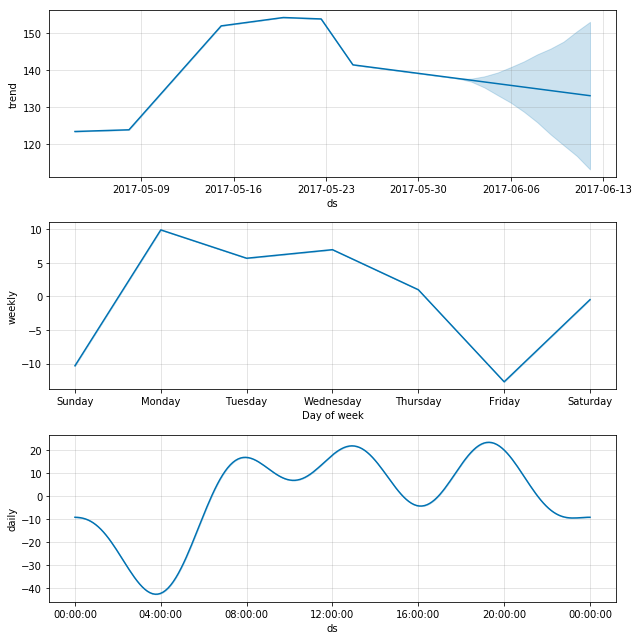

In [74]:
m_2.plot_components(forecast)

In [51]:
cols=['date', 'sgv','type']
df_bg=df_bg[cols]
# df_bg = df_bg.set_index('date').sort_index()

In [52]:
start='2017-05-01'
end='2017-06-01'
test_range = pd.date_range(start, end)

In [53]:
m = Prophet()
df_bg['ds']=df_bg['date']
df_bg['y'] = df_bg['sgv']
df_bg = df_bg.set_index('date').sort_index()
m.fit(df_bg[start:end])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [54]:
future = m.make_future_dataframe(periods=10)
future.tail()

,ds
9051,2017-06-07 23:56:05
9052,2017-06-08 23:56:05
9053,2017-06-09 23:56:05
9054,2017-06-10 23:56:05
9055,2017-06-11 23:56:05


In [55]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9051,2017-06-07 23:56:05,126.422654,73.875480,183.545416
9052,2017-06-08 23:56:05,116.601226,56.129063,174.443818
9053,2017-06-09 23:56:05,111.398085,57.292484,171.577801
9054,2017-06-10 23:56:05,135.371468,82.468462,191.900459
9055,2017-06-11 23:56:05,136.410619,80.375640,197.832060


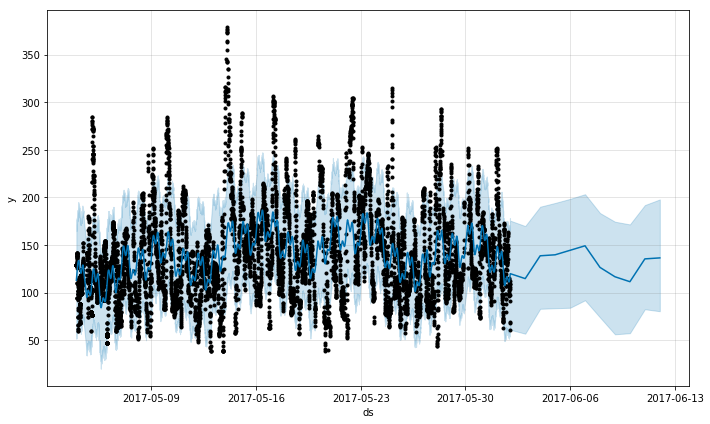

In [56]:
fig1 = m.plot(forecast)

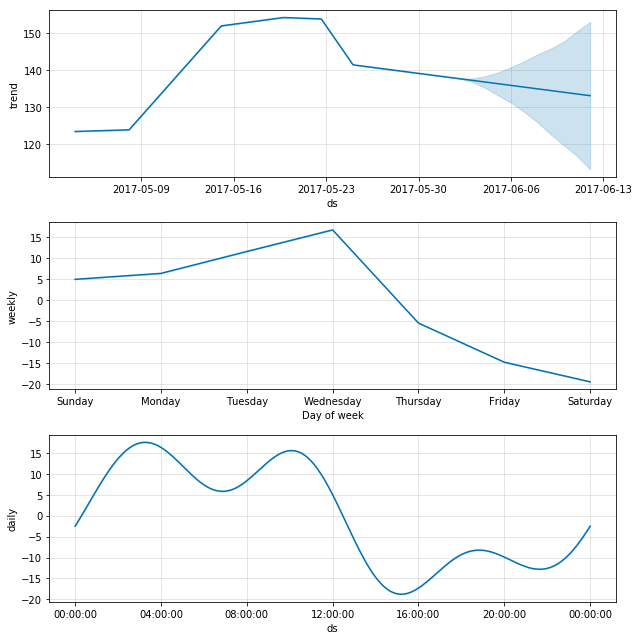

In [57]:
fig2 = m.plot_components(forecast)

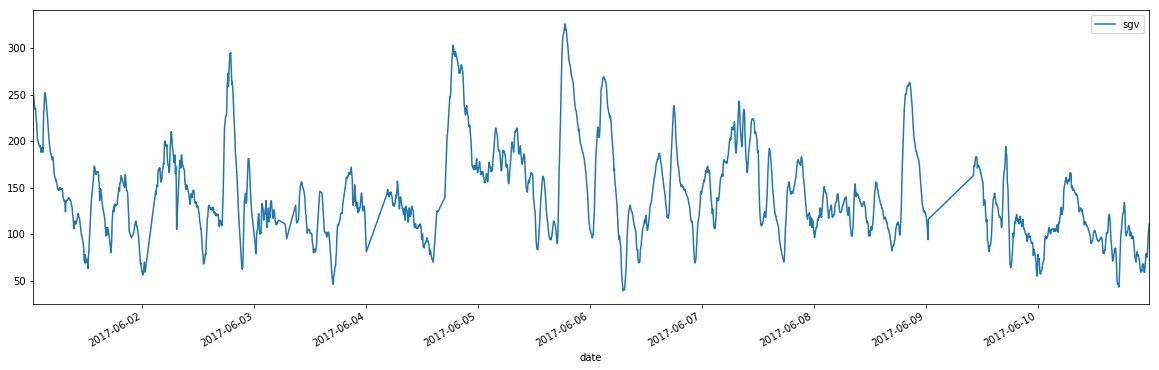

In [39]:
df_bg[start:end].plot(y='sgv', figsize=(20, 6))